In [4]:
#Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Store filepath in a variable
file = Path("Resources/NewYorkAirBnB.csv")
file_df = pd.read_csv(file)
file_df.head()

,id,host_id,host_name,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,...,bedrooms,beds,price,number_of_reviews,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,8.017500e+17,495455523,Michael,Canarsie,Brooklyn,40.640403,-73.888535,Private room in home,Private room,2,...,1.0,1.0,$143.00,0,NaN,NaN,NaN,NaN,NaN,NaN
1,7.659490e+17,488760226,Eric,Canarsie,Brooklyn,40.648510,-73.894330,Private room in rental unit,Private room,1,...,1.0,1.0,$30.00,13,4.77,4.77,4.85,4.92,4.85,4.92
2,6.362740e+17,461263600,Tommaso,Tottenville,Staten Island,40.507114,-74.251907,Entire villa,Entire home/apt,6,...,2.0,2.0,$157.00,0,NaN,NaN,NaN,NaN,NaN,NaN
3,7.681250e+17,475699129,Suliman,Sheepshead Bay,Brooklyn,40.583490,-73.959880,Private room in home,Private room,2,...,3.0,1.0,$89.00,15,5.00,4.87,5.00,5.00,5.00,5.00
4,4.924826e+07,397288055,Katherine,North Riverdale,Bronx,40.903260,-73.907090,Entire rental unit,Entire home/apt,3,...,2.0,2.0,$125.00,25,4.56,4.44,4.72,4.88,4.72,4.64


In [12]:
#Count how many reservations were made in each borough
file_df['neighbourhood_group_cleansed'].value_counts()

Manhattan        17658
Brooklyn         16237
Queens            6916
Bronx             1691
Staten Island      429
Name: neighbourhood_group_cleansed, dtype: int64

<Axes: title={'center': 'AirBnB Reservations in Each Borough'}, ylabel='Reservations'>

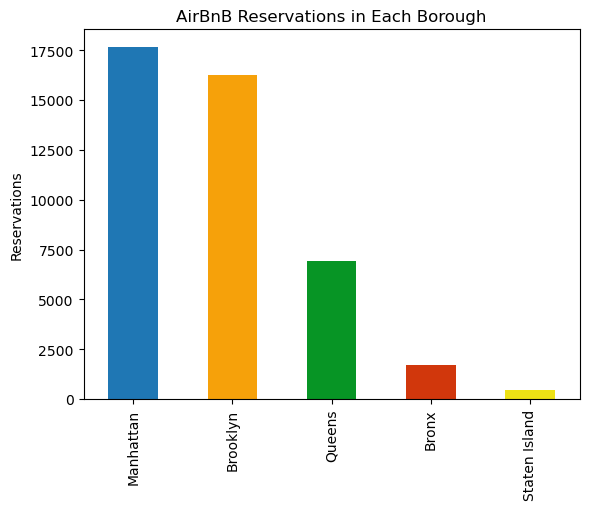

In [19]:
#Plot the borough reservation counts on a bar graph and assign a color for each borough that will stay the same for every graph
file_df['neighbourhood_group_cleansed'].value_counts().plot(kind='bar',
                                                            title='AirBnB Reservations in Each Borough', 
                                                            ylabel='Reservations', 
                                                            color=['#1f77b4', '#F6A10A', '#079525', '#D1370C', '#EEE215'])

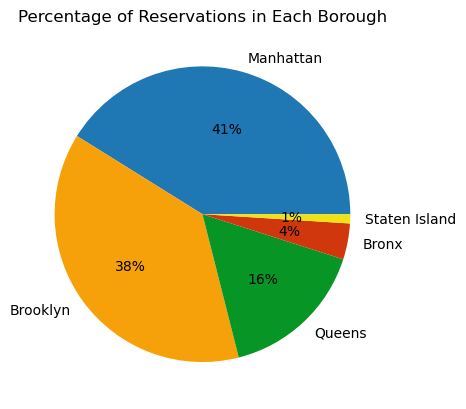

In [22]:
#Plot the borough reservation counts on a pie chart with the same colors, adding in percentages within each wedge
file_df['neighbourhood_group_cleansed'].value_counts().plot.pie(
              title='Percentage of Reservations in Each Borough', 
              ylabel='',
              autopct='%1.0f%%', 
              colors=['#1f77b4', '#F6A10A', '#079525', '#D1370C', '#EEE215'])
plt.show()

In [7]:
#Assign the price dollar values as a float in order to group them by mean, gathering the average Airbnb price for each borough
file_df['price'] = file_df['price'].replace("[$,]", "", regex=True).astype(float)
file_df.groupby('neighbourhood_group_cleansed')['price'].mean()

neighbourhood_group_cleansed
Bronx            117.512123
Brooklyn         162.766829
Manhattan        268.365783
Queens           128.173655
Staten Island    309.037296
Name: price, dtype: float64

<Axes: title={'center': 'Average Price of AirBnB in Each Borough'}, ylabel='Price (Dollars)'>

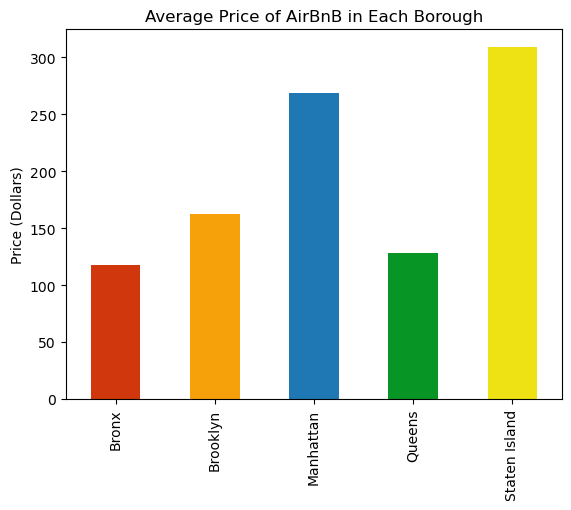

In [24]:
#Plot the average price on a bar graph
avg_price = file_df.groupby('neighbourhood_group_cleansed')['price'].mean()
avg_price.plot(kind='bar', 
               title='Average Price of AirBnB in Each Borough', 
               xlabel='', 
               ylabel='Price (Dollars)', 
               color=['#D1370C', '#F6A10A', '#1f77b4', '#079525', '#EEE215'])